# Proyek Analisis Data : Bike-Shering-dataset


*   Nama : ilham Muhammad Haikal
*   Email : haikal.milham13@gmail.com
*   username : ilham_muhammad_haikal_luLn

# Menentuka Pertanyaan bisnis



1.   Bagaimana jumlah total persewaan sepeda bervariasi menurut musim?
2.   Bagaimana fluktuasi persewaan sepeda pada jam-jam berbeda dalam sehari pada hari kerja?



# import semua library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# **DATA WRANGLING**

# 1. memuat tabel day

In [4]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 2. memuat tabel hour

In [5]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 3. menilai data day

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terdapat kesalahan tipe data pada kolom dteday, kolom tersebut seharusnya di representasikan sebagai string seharusnya disimpan dengan data tanggal

In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("jumlah data duplikat:", day_df.duplicated().sum())
day_df.describe()

jumlah data duplikat: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Nilai kelembapan 0 tidak mungkin dalam kondisi nyata, jadi ini adalah nilai yang tidak akurat.

# 4. Menilai data hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terdapat kesalahan tipe data pada kolom dteday, kolom tersebut di representasikan sebagai string seharusnya disimpan dengan data tanggal

In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("jumlah data duplikasi:", hour_df.duplicated().sum())
hour_df.describe()

jumlah data duplikasi: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Nilai kelembapan 0 tidak mungkin dalam kondisi nyata, jadi ini adalah nilai yang tidak akurat.

# CLEANING DATA

# 1. membersihkan data day

In [12]:
# Untuk dataset day_df
median_hum_day = day_df['hum'].median()  # Menghitung median dari kolom hum
day_df['hum'] = day_df['hum'].replace(0, median_hum_day)  # Mengganti nilai 0 dengan median

# Menampilkan hasil untuk memastikan perubahan sudah dilakukan
print("Nilai median pada kolom 'hum' di day_df:", median_hum_day)

Nilai median pada kolom 'hum' di day_df: 0.626667


In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
# Mengubah tipe data pada day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Mengubah kolom dteday menjadi datetime

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
# Mengonversi kolom 'dteday' ke bentuk numerik (jumlah hari sejak tanggal paling awal)
day_df['dteday_numeric'] = (pd.to_datetime(day_df['dteday']) - pd.to_datetime(day_df['dteday']).min()).dt.days

# Menghitung standar deviasi dari kolom 'dteday_numeric'
std_dteday = day_df['dteday_numeric'].std()

# Menampilkan hasil standar deviasi
print(f"Standard Deviation for 'dteday_numeric': {std_dteday}")

# Melihat apakah ada NaN di DataFrame
print(day_df.isnull().sum())


Standard Deviation for 'dteday_numeric': 211.16581162678773
instant           0
dteday            0
season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
dteday_numeric    0
dtype: int64


# 2. Membersihkan data hour

In [17]:
# Untuk dataset hour_df
median_hum_hour = hour_df['hum'].median()  # Menghitung median dari kolom hum
hour_df['hum'] = hour_df['hum'].replace(0, median_hum_hour)  # Mengganti nilai 0 dengan median

print("Nilai median pada kolom 'hum' di hour_df:", median_hum_hour)

Nilai median pada kolom 'hum' di hour_df: 0.63


In [18]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [19]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])  # Mengubah kolom dteday menjadi datetime
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


# EKSPLORASI DATA ANALYST (EDA)

# 1. Eksplorasi data day

In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_numeric
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837,365.000000
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000,182.500000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,365.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,547.500000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,730.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452,211.165812


In [21]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"]
})

cnt                                      temp                      \
         max   min         mean          std       max       min      mean   
season                                                                       
1       7836   431  2604.132597  1399.942119  0.572500  0.059130  0.297748   
2       8362   795  4992.331522  1695.977235  0.808333  0.253043  0.544405   
3       8714  1115  5644.303191  1459.800381  0.861667  0.469167  0.706309   
4       8555    22  4728.162921  1699.615261  0.657500  0.220833  0.422906   

                       hum                               windspeed            \
             std       max       min      mean       std       max       min   
season                                                                         
1       0.102735  0.948261  0.187917  0.586365  0.145528  0.507463  0.045408   
2       0.122650  0.922500  0.254167  0.626948  0.152841  0.388067  0.065929   
3       0.070848  0.939565  0.360000  0.633482  0.119349  0.375617  0.064071   
4       0.107834  0.972500  0.333478  0.668719  0.131248  0.422275  0.022392   

                            
            mean       std  
season                      
1       0.214537  0.086439  
2       0.203507  0.071629  
3       0.172095  0.059526  
4       0.171995  0.081565

In [22]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

,cnt
season,
3,188
2,182
1,179
4,176


In [23]:
day_df.groupby(by="season").dteday.nunique().sort_values(ascending=False)

,dteday
season,
3,188
2,184
1,181
4,178


# 2. Eksplorasi data hour

In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599


In [25]:
hour_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"]
})

cnt                              temp                            hum  \
        max min        mean         std   max   min      mean       std  max   
season                                                                         
1       801   1  111.114569  119.224010  0.72  0.02  0.299147  0.118726  1.0   
2       957   1  208.344069  188.362473  0.94  0.16  0.544663  0.139233  1.0   
3       977   1  236.016237  197.711630  1.00  0.38  0.706410  0.093903  1.0   
4       967   1  198.868856  182.967972  0.76  0.14  0.423138  0.122167  1.0   

                                 windspeed                           
         min      mean       std       max  min      mean       std  
season                                                               
1       0.08  0.584616  0.194961    0.8060  0.0  0.215107  0.136914  
2       0.16  0.627022  0.205364    0.7164  0.0  0.203410  0.117368  
3       0.16  0.633167  0.177866    0.8507  0.0  0.171593  0.109354  
4       0.16  0.667124  0.178149    0.6418  0.0  0.170819  0.118666

In [26]:
hour_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

,cnt
season,
3,760
2,721
4,690
1,482


In [27]:
hour_df.groupby(by="season").dteday.nunique().sort_values(ascending=False)

,dteday
season,
3,188
2,184
1,181
4,178


# 3. Eksplorasi data all

In [28]:
# Menggabungkan day_df dan hour_df berdasarkan kolom 'dteday'
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    on=["dteday", "season"]
)
all_df.head()

,instant_x,dteday,season,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
all_df.groupby(by=["season", "weathersit_x"]).agg({
    "cnt_x": "sum",       # Menghitung total penggunaan sepeda dari data day_df
    "temp_x": "mean"      # Menghitung rata-rata suhu dari data day_df
})


cnt_x    temp_x
season weathersit_x                    
1      1              7403153  0.302909
       2              3691552  0.294413
       3                84442  0.270465
2      1             15034838  0.563640
       2              6905065  0.521020
       3                84168  0.365278
3      1             19151581  0.720915
       2              6009606  0.674555
       3               259616  0.592340
4      1             12453183  0.404949
       2              7245992  0.447343
       3               467854  0.457685

In [30]:
all_df.groupby(by=["season", "registered_y"]).agg({
    "windspeed_y": "sum",       # Menghitung total penggunaan sepeda dari data hour_df
    "workingday_y": "mean"      # Menghitung rata-rata suhu dari data hour_df
})

windspeed_y  workingday_y
season registered_y                           
1      0                  2.1492      0.727273
       1                 24.6872      0.689922
       2                 23.9260      0.712000
       3                 20.1646      0.705357
       4                 13.6272      0.705128
...                          ...           ...
4      839                0.1940      1.000000
       857                0.2239      1.000000
       860                0.2836      1.000000
       871                0.0000      1.000000
       876                0.2985      1.000000

[2318 rows x 2 columns]

# VISUALISASI DATA

# 1. Bagaimana jumlah total persewaan sepeda bervariasi menurut musim?

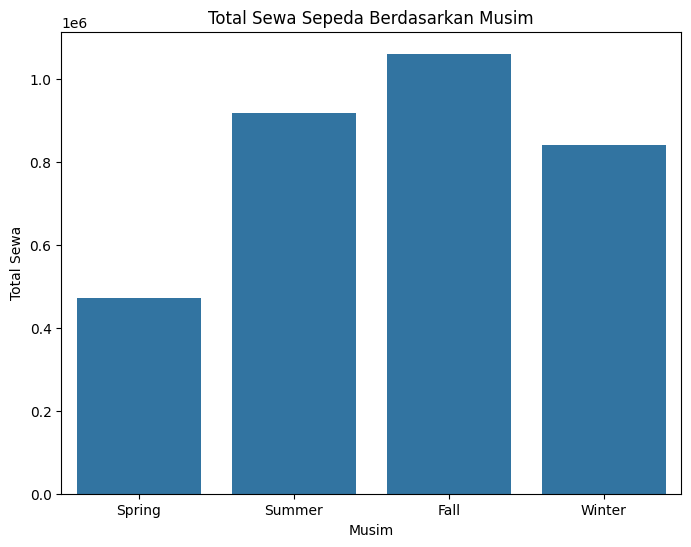

In [31]:
# Aggregating the total number of rentals by season
season_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

# Mapping season numbers to names for better clarity
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rentals['season'] = season_rentals['season'].map(season_names)

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=season_rentals)
plt.title('Total Sewa Sepeda Berdasarkan Musim')
plt.ylabel('Total Sewa')
plt.xlabel('Musim')
plt.show()

# 2. Bagaimana fluktuasi persewaan sepeda pada jam-jam berbeda dalam sehari pada hari kerja?

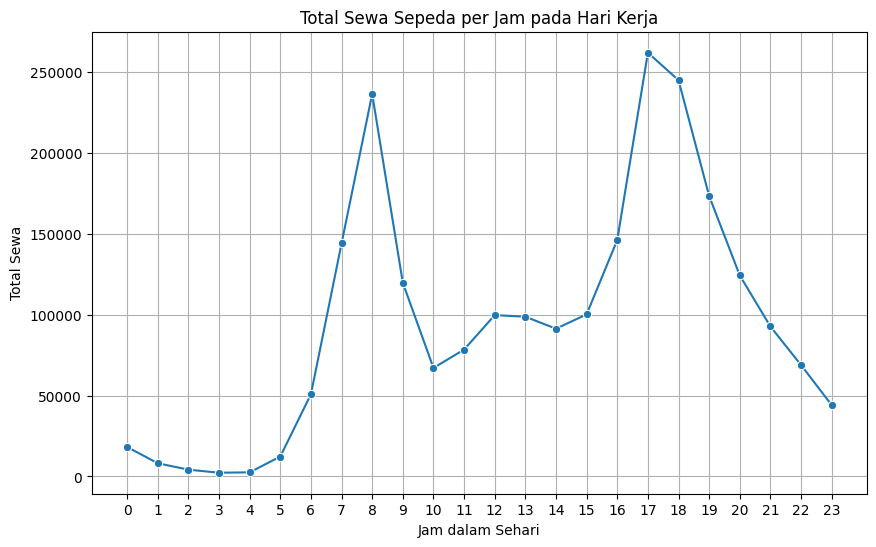

In [32]:
working_day_rentals = hour_df[hour_df['workingday'] == 1]


hourly_rentals = working_day_rentals.groupby('hr')['cnt'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_rentals, marker='o')
plt.title('Total Sewa Sepeda per Jam pada Hari Kerja')
plt.ylabel('Total Sewa')
plt.xlabel('Jam dalam Sehari')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# 3. time series analysis

In [34]:
all_df.to_csv("all_data_bike.csv", index=False)

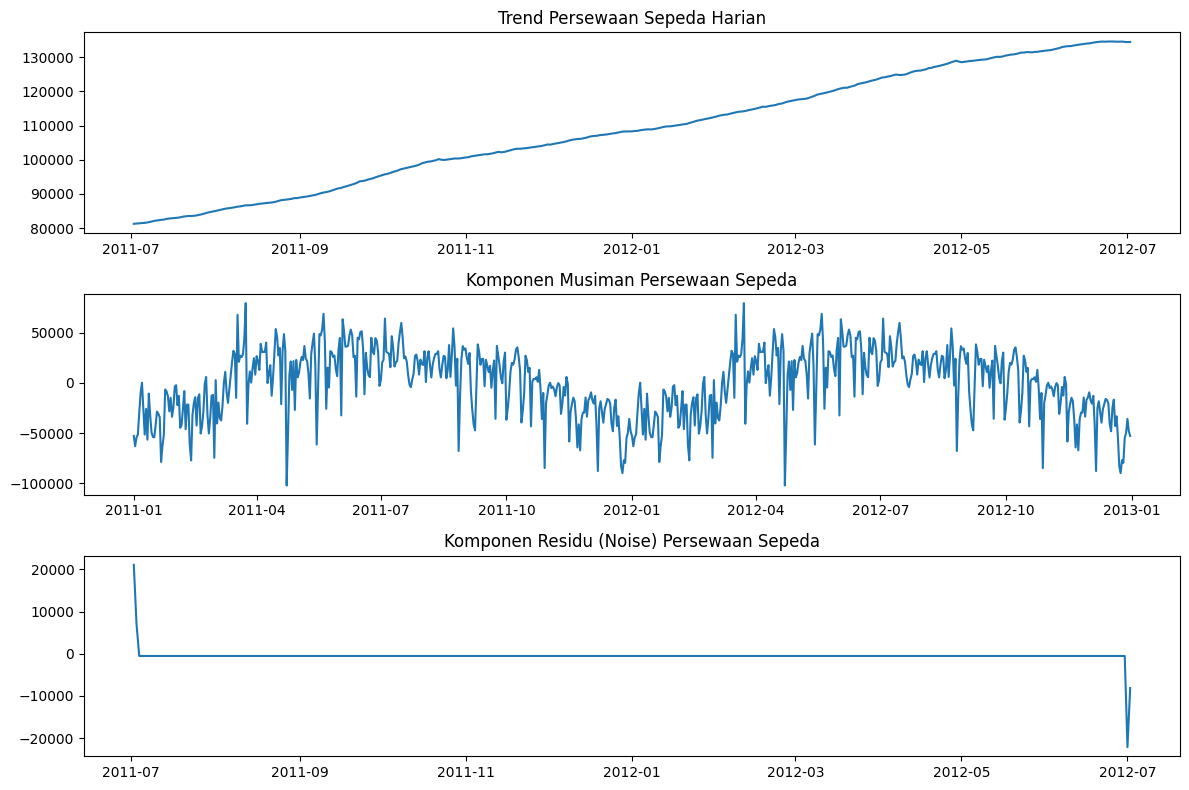

In [41]:
# Memuat dataset
df = pd.read_csv('all_data_bike.csv')

# Mengubah kolom 'dteday' menjadi format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Mengelompokkan data harian berdasarkan tanggal dan menjumlahkan penggunaan sepeda
daily_rentals = df.groupby('dteday')['cnt_x'].sum().reset_index()

# Menjadikan tanggal sebagai indeks untuk analisis time series
daily_rentals.set_index('dteday', inplace=True)

# Menggunakan seasonal decomposition untuk membagi data menjadi tren, musiman, dan residu
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_rentals['cnt_x'], model='additive', period=365)

# Plot komponen-komponennya
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(decomposition.trend)
plt.title('Trend Persewaan Sepeda Harian')

plt.subplot(312)
plt.plot(decomposition.seasonal)
plt.title('Komponen Musiman Persewaan Sepeda')

plt.subplot(313)
plt.plot(decomposition.resid)
plt.title('Komponen Residu (Noise) Persewaan Sepeda')

plt.tight_layout()
plt.show()


Penjelasan:
*   Trend: Grafik pertama menunjukkan tren jangka panjang dalam penggunaan sepeda. Ini dapat memberi kita gambaran umum apakah penggunaan sepeda meningkat atau menurun dari waktu ke waktu.

Identifikasi Tren Jangka Panjang: Dengan mengetahui tren jangka panjang, kita bisa memahami apakah penggunaan sepeda cenderung naik, turun, atau stabil sepanjang waktu.
*   Komponen Musiman: Grafik kedua menunjukkan pola musiman dalam data. Sebagai contoh, jika ada peningkatan penggunaan sepeda pada musim panas atau hari libur tertentu, pola ini akan terlihat di sini.

Pola Musiman: Dengan analisis musiman, kita bisa mengidentifikasi periode dalam setahun di mana penggunaan sepeda cenderung meningkat atau menurun.
*   Residu (Noise): Grafik ketiga menunjukkan bagian dari data yang tidak dijelaskan oleh tren atau pola musiman, yaitu fluktuasi acak.

Residuals: Bagian ini menunjukkan variabilitas yang tidak bisa dijelaskan oleh tren dan pola musiman, yang bisa membantu kita memahami ketidakpastian dalam data.





In [ ]:
# Cek nama-nama kolom dalam dataframe
print(day_df.columns)

Index(['instant_x', 'dteday', 'season', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'dteday_numeric', 'instant_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


# CONCLUSION



1.   Conclusion Pertanyaan 1
Berdasarkan grafik Total Sewa Sepeda Berdasarkan Musim, dapat disimpulkan bahwa:
Fall (Musim Gugur) mencatat jumlah sewa sepeda tertinggi, menunjukkan bahwa cuaca yang sejuk mungkin mendorong orang untuk lebih banyak menggunakan sepeda.
Summer (Musim Panas) juga menunjukkan jumlah sewa sepeda yang cukup tinggi, meskipun sedikit lebih rendah daripada Fall, mungkin karena musim panas yang lebih panjang dan kesempatan rekreasi.
Winter (Musim Dingin) memiliki jumlah sewa sepeda yang relatif lebih rendah daripada Fall dan Summer. Hal ini bisa disebabkan oleh cuaca yang lebih dingin yang kurang mendukung kegiatan bersepeda.
Spring (Musim Semi) mencatat jumlah sewa sepeda terendah, menunjukkan bahwa cuaca di awal musim semi mungkin masih kurang ideal bagi pengguna sepeda.
Secara keseluruhan, pola ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda di musim dengan cuaca yang lebih hangat dan sejuk (Fall dan Summer), sementara di musim dingin (Winter) dan musim semi (Spring), penggunaan sepeda menurun.
2.   Conclusion Pertanyaan 2
Berdasarkan grafik di atas, berikut beberapa poin utama terkait fluktuasi persewaan sepeda pada jam-jam berbeda dalam sehari pada hari kerja:

*   Jam Sibuk Pagi (08:00): Terdapat lonjakan signifikan pada sekitar jam 08:00 pagi, menunjukkan bahwa banyak orang menggunakan sepeda untuk bepergian ke tempat kerja atau sekolah pada jam tersebut. Ini mencerminkan puncak aktivitas saat perjalanan pagi.
*   Jam Sibuk Sore (17:00 - 18:00): Puncak kedua terlihat pada sekitar jam 17:00 - 18:00, yang menunjukkan lonjakan aktivitas ketika orang-orang pulang kerja atau sekolah. Hal ini mengindikasikan bahwa sepeda banyak digunakan untuk perjalanan pulang di sore hari.
*   Jam Tenang (09:00 - 15:00): Di luar jam sibuk, penggunaan sepeda cenderung menurun, terutama setelah jam 09:00 hingga sore hari sebelum puncak sore. Penggunaan sepeda relatif rendah di antara jam 10:00 hingga 15:00, yang mungkin disebabkan oleh kegiatan kerja atau sekolah yang sedang berlangsung selama waktu ini.
*   Malam Hari (19:00 - 23:00): Setelah puncak aktivitas sore, penggunaan sepeda mulai berkurang secara signifikan pada malam hari, dengan jumlah pengguna yang semakin sedikit menjelang tengah malam.
Kesimpulan Umum: Penggunaan sepeda sangat dipengaruhi oleh kebutuhan perjalanan pada jam sibuk pagi dan sore hari, dengan dua puncak aktivitas utama pada jam 08:00 dan 17:00 - 18:00. Waktu-waktu tersebut mencerminkan pola penggunaan yang khas pada hari kerja, dengan mayoritas pengguna sepeda menggunakannya sebagai alat transportasi utama selama jam sibuk.

